In [2]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
# Load the data
df = pd.read_csv("dataset.csv")

# Display the first few rows
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          241 non-null    int64 
 1   Order Number  241 non-null    object
 2   Date          241 non-null    object
 3   Total Price   238 non-null    object
 4   Product       241 non-null    object
dtypes: int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
# Check for missing values
print(df.isnull().sum())

# Drop empty rows if necessary
df.dropna(inplace=True)

Year            0
Order Number    0
Date            0
Total Price     3
Product         0
dtype: int64


In [5]:
# Remove currency symbols and commas from 'Total Price', convert to float
df['Total Price'] = df['Total Price'].replace({'₹': '', ',': ''}, regex=True)
df['Total Price'] = pd.to_numeric(df['Total Price'], errors='coerce')

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y', errors='coerce')

# Extract additional features
df['Month'] = df['Date'].dt.month_name()
df['Day of Week'] = df['Date'].dt.day_name()

# Check cleaned data
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, 0 to 240
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Year          238 non-null    int64         
 1   Order Number  238 non-null    object        
 2   Date          238 non-null    datetime64[ns]
 3   Total Price   238 non-null    float64       
 4   Product       238 non-null    object        
 5   Month         238 non-null    object        
 6   Day of Week   238 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 14.9+ KB


(None,
    Year         Order Number       Date  Total Price  \
 0  2024  408-2652756-4522741 2024-12-19       4545.0   
 1  2024  408-4122061-0998700 2024-12-02       8999.0   
 2  2024  408-0433893-3521114 2024-12-02          0.0   
 3  2024  408-6100760-7361151 2024-11-28        147.0   
 4  2024  408-5313454-9553129 2024-11-28        645.0   
 
                                              Product     Month Day of Week  
 0  Philips Cordless Epilator– All-Rounder for Fac...  December    Thursday  
 1  Aquaguard Sure Delight NXT 6-Stage Water Purif...  December      Monday  
 2      Kitchen Installation Service by Eureka Forbes  December      Monday  
 3  Ferrai Girl's Stretchable Belt Pack of 1 Black...  November    Thursday  
 4                     Harpic Limescale Remover 750ml  November    Thursday  )

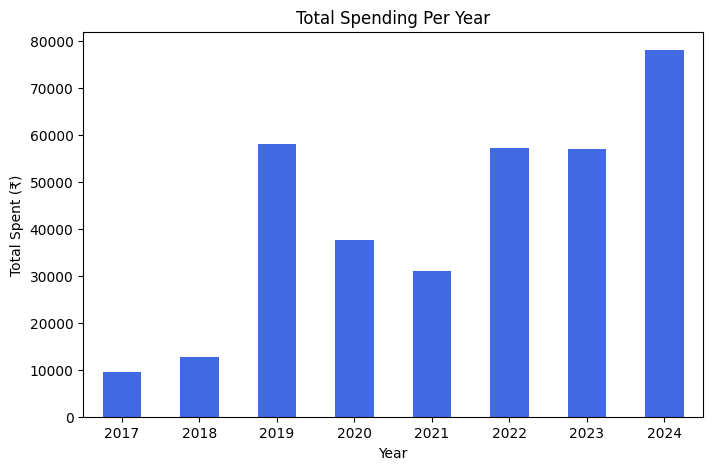

In [6]:
# Group by Year and sum Total Price
yearly_spending = df.groupby("Year")["Total Price"].sum()

# Plot
plt.figure(figsize=(8,5))
yearly_spending.plot(kind="bar", color="royalblue")
plt.xlabel("Year")
plt.ylabel("Total Spent (₹)")
plt.title("Total Spending Per Year")
plt.xticks(rotation=0)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

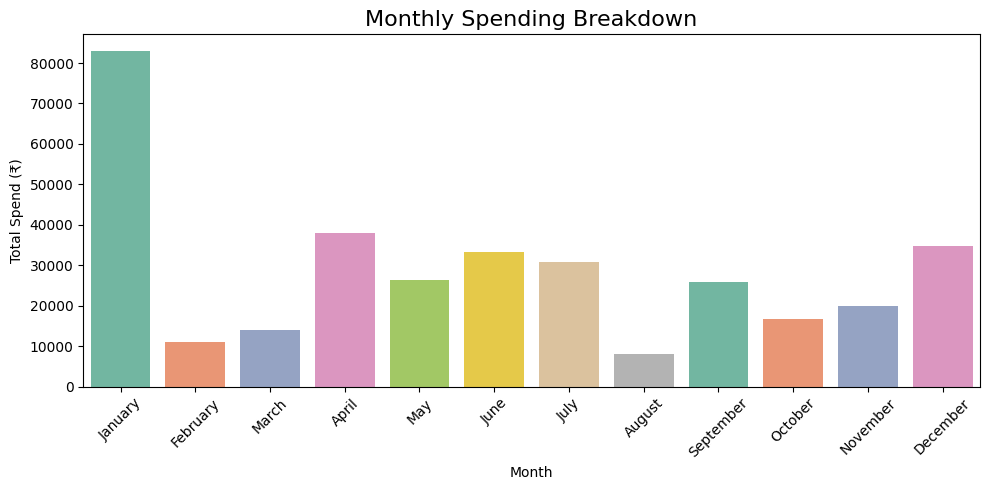

In [7]:
#Monthly spending breakdown
monthly_spend = df.groupby('Month')['Total Price'].sum().reindex(['January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
])

#plotting
plt.figure(figsize=(10,5))
sns.barplot(x = monthly_spend.index, y=monthly_spend.values, hue=monthly_spend.index, palette='Set2')
plt.title('Monthly Spending Breakdown', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Total Spend (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

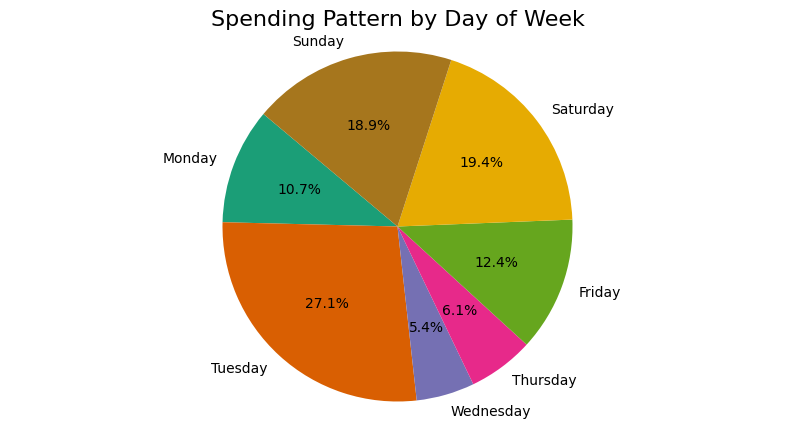

In [8]:
#Daily spending breakdown
daily_spend = df.groupby('Day of Week')['Total Price'].sum().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

# Drop days with zero spending for a cleaner pie chart
daily_spend = daily_spend.dropna()

#plotting
plt.figure(figsize=(10,5))
plt.pie(daily_spend, labels=daily_spend.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Dark2'))
plt.title('Spending Pattern by Day of Week', fontsize=16)
plt.axis('equal') 
plt.show()

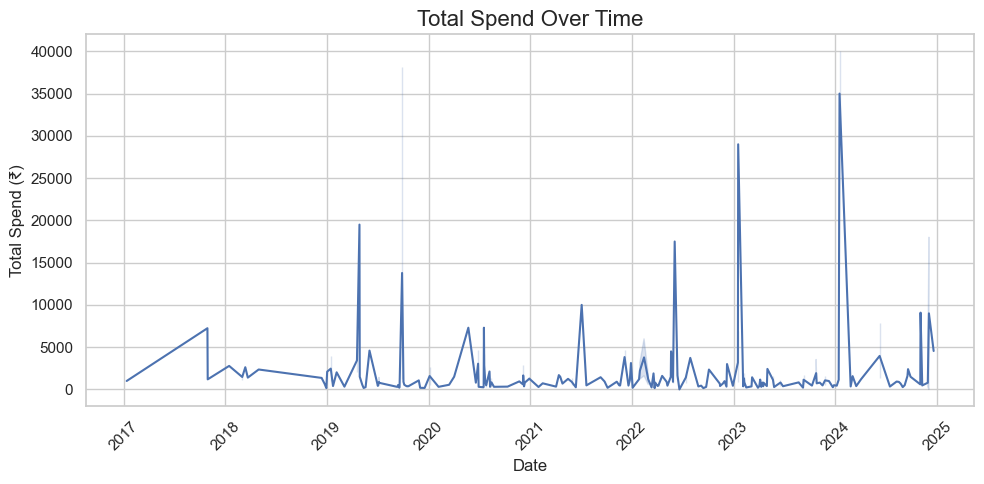

In [9]:
#Total Spending Over Time
sns.set(style="whitegrid")

# Total Spend Over Time
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Date', y='Total Price', estimator='sum')
plt.title('Total Spend Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Total Spend (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\KAREN\AppData\Local\Temp\ipykernel_13884\3308390200.py:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


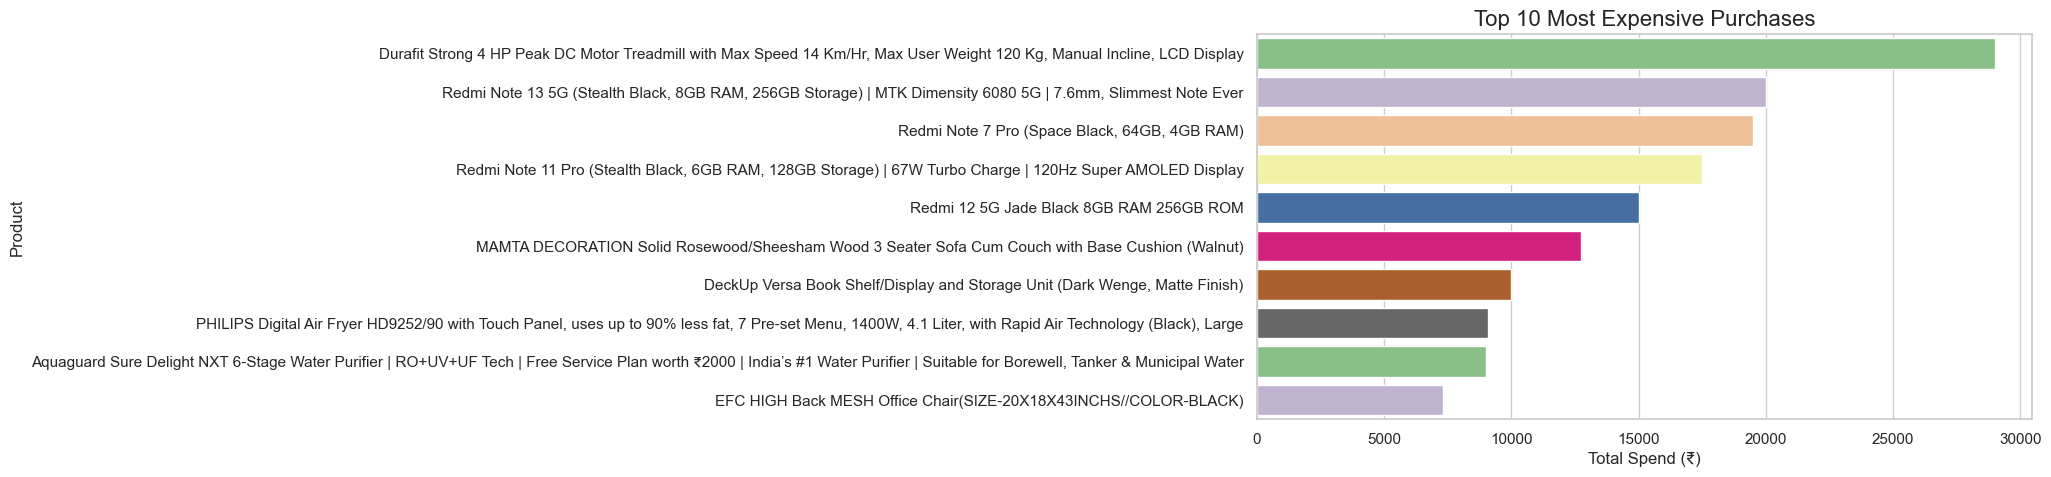

In [10]:
#10 Most expensive purchases

#sorting by price
top_expensive = df.sort_values(by='Total Price', ascending=False).head(10)

#plotting
plt.figure(figsize=(10,5))
sns.barplot(y=top_expensive['Product'], x=top_expensive['Total Price'], hue=top_expensive['Product'], palette='Accent')
plt.title('Top 10 Most Expensive Purchases', fontsize=16)
plt.xlabel('Total Spend (₹)')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

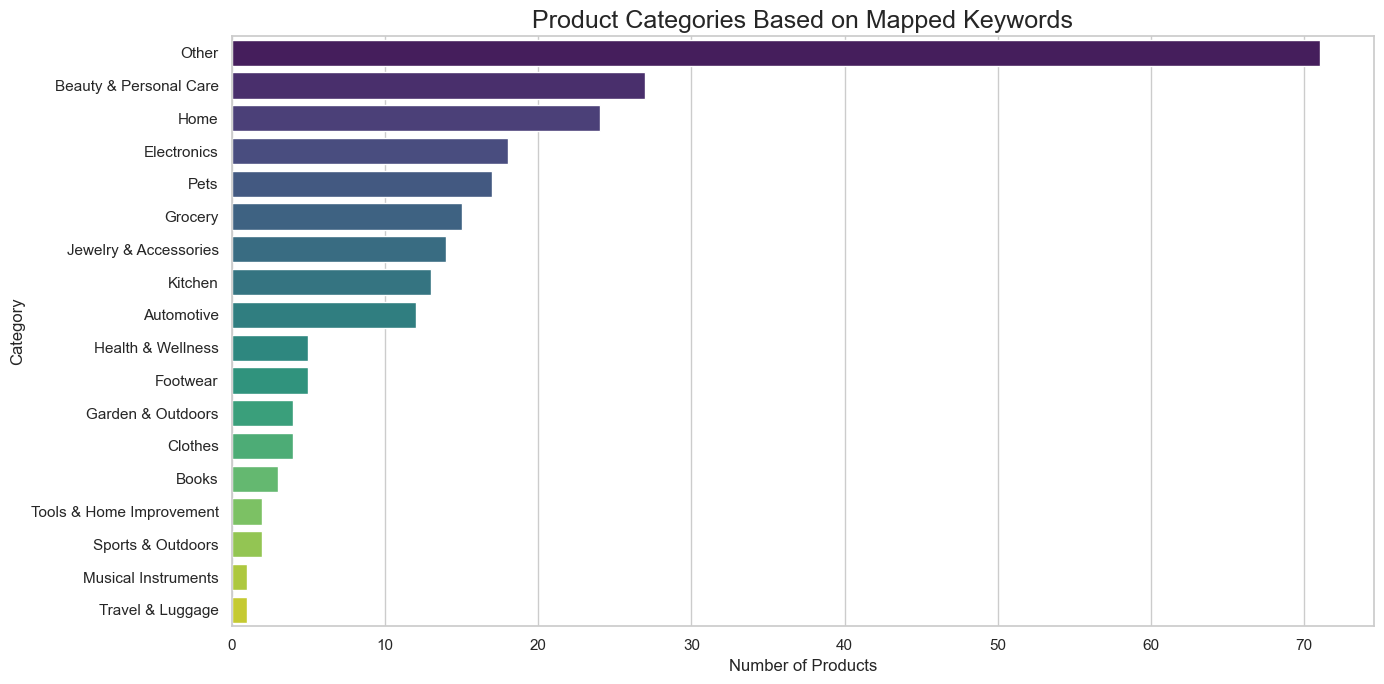

In [17]:
#Product Categorization

stopwords = {
    'for', 'with', 'the', 'and', 'by', 'of', 'pack', 'set', 'in', 'on', 'to', 'from',
    'ml', 'gm', 'kg', 'pcs', 'piece', 'pieces', 'inch', 'size', 'new', 'all', 'rounder',
    'multi', 'color', 'combo', 'portable', 'product', 'free', 'extra', 'includes', 'model',
    'home', 'kitchen', 'portable', 'amazon', 'india', 'combo', 'pack', 'set', 'includes'
}

# Extended Category Keywords

category_keywords = {
    'Electronics': ['laptop', 'phone', 'mobile', 'charger', 'earphone', 'headphone', 'camera', 'tablet', 'monitor', 'tv', 'smartwatch', 'speaker', 'powerbank', 'router','earbuds', 'dryer','redmi', 'note', 'pro', 'prime', 'mic'],
    'Clothes': ['shirt', 'jeans', 'tshirt', 'jacket', 'dress', 'pant', 'shorts', 'sweater', 'socks', 'hoodie', 'skirt', 'suit', 'lingerie', 'cap', 'scarf','vest'],
    'Home': ['furniture', 'sofa', 'table', 'chair', 'bed', 'mattress', 'curtain', 'lamp', 'rug', 'shelf', 'decor', 'pillow', 'clock', 'mirror', 'ornament','stand','storage','plastic','vinyl'],
    'Kitchen': [ 'pan', 'pot','bottle', 'mug', 'plate', 'spoon', 'blender', 'oven', 'toaster', 'mixer', 'kettle', 'juicer', 'stove', 'fridge', 'microwave','purifier','fryer'],
    'Pets': ['dog', 'cat', 'leash', 'collar', 'kennel', 'toy', 'treat', 'litter', 'fish', 'bird', 'hamster', 'pet food', 'aquarium', 'cage','pet', "dog's",'dogs'],
    'Books': ['book','books', 'novel', 'comic', 'magazine', 'journal', 'guide', 'textbook', 'encyclopedia', 'manual', 'storybook', 'poetry'],
    'Grocery': ['rice', 'oil', 'sugar', 'flour', 'salt', 'spices', 'snack', 'milk', 'bread', 'butter', 'cereal', 'vegetable', 'fruit', 'pasta', 'coffee', 'tea', 'food','beverage','healthy'],
    'Beauty & Personal Care': ['shampoo', 'conditioner', 'lotion', 'cream', 'soap', 'perfume', 'makeup', 'razor', 'toothpaste', 'skincare', 'deodorant', 'serum','body','hair','face','skin', 'pads', 'brush', 'liquid'],
    'Health & Wellness': ['vitamin', 'supplement', 'protein', 'medicine', 'bandage', 'sanitizer', 'mask', 'yoga', 'fitness', 'tracker', 'weight', 'gluten'],
    'Sports & Outdoors': ['bicycle', 'treadmill', 'dumbbell', 'bat', 'ball', 'racket', 'tent', 'backpack', 'hiking', 'camping', 'fishing', 'kayak'],
    'Toys & Games': ['puzzle', 'lego', 'boardgame', 'doll', 'action', 'figure', 'cards', 'drone', 'console', 'playstation', 'xbox', 'gaming'],
    'Automotive': ['car', 'bike', 'tire', 'helmet', 'oil', 'battery', 'wiper', 'headlight', 'mat', 'gps', 'seat'],
    'Office Supplies': ['pen', 'notebook', 'diary', 'paper', 'printer', 'ink', 'stapler', 'folder', 'marker', 'highlighter', 'binder'],
    'Jewelry & Accessories': ['watch', 'ring', 'necklace', 'bracelet', 'earring', 'wallet', 'belt', 'sunglasses', 'handbag', 'clutch', 'backpack','bag','umbrella',],
    'Tools & Home Improvement': ['drill', 'hammer', 'screwdriver', 'wrench', 'ladder', 'paint', 'glue', 'saw', 'pliers', 'toolbox','board','knife'],
    'Musical Instruments': ['guitar', 'piano', 'violin', 'flute', 'drum', 'keyboard', 'amplifier', 'ukulele', 'saxophone'],
    'Movies & Music': ['dvd', 'blu-ray', 'record', 'movie', 'soundtrack', 'album', 'concert'],
    'Garden & Outdoors': ['plant', 'soil', 'fertilizer', 'seeds', 'lawnmower', 'hose', 'patio', 'rake', 'shovel', 'gardening'],
    'Travel & Luggage': ['suitcase', 'backpack', 'pillow', 'passport', 'luggage', 'trolley', 'duffel', 'organizer'],
    'Footwear': ['shoes', 'sneakers', 'sandals', 'boots', 'flipflops', 'heels', 'loafers', 'slippers']
}

# Function to Map Product to Category
def map_to_category(product_name):
    tokens = re.findall(r'\b\w+\b', str(product_name).lower())
    tokens = [word for word in tokens if word not in stopwords and len(word) > 2]
    for token in tokens:
        for category, keywords in category_keywords.items():
            if token in keywords:
                return category
    return 'Other'  # Default if no category match

# Apply the function to map each product
df['Category'] = df['Product'].apply(map_to_category)

# Category Count and Visualization
# Count the number of products per category
category_counts = df['Category'].value_counts()

# Convert to DataFrame for plotting
category_df = category_counts.reset_index()
category_df.columns = ['Category', 'Count']

# Plotting the categorized products
plt.figure(figsize=(14,7))
sns.barplot(x='Count', y='Category', data=category_df, hue='Category', palette='viridis')
plt.title('Product Categories Based on Mapped Keywords', fontsize=18)
plt.xlabel('Number of Products')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

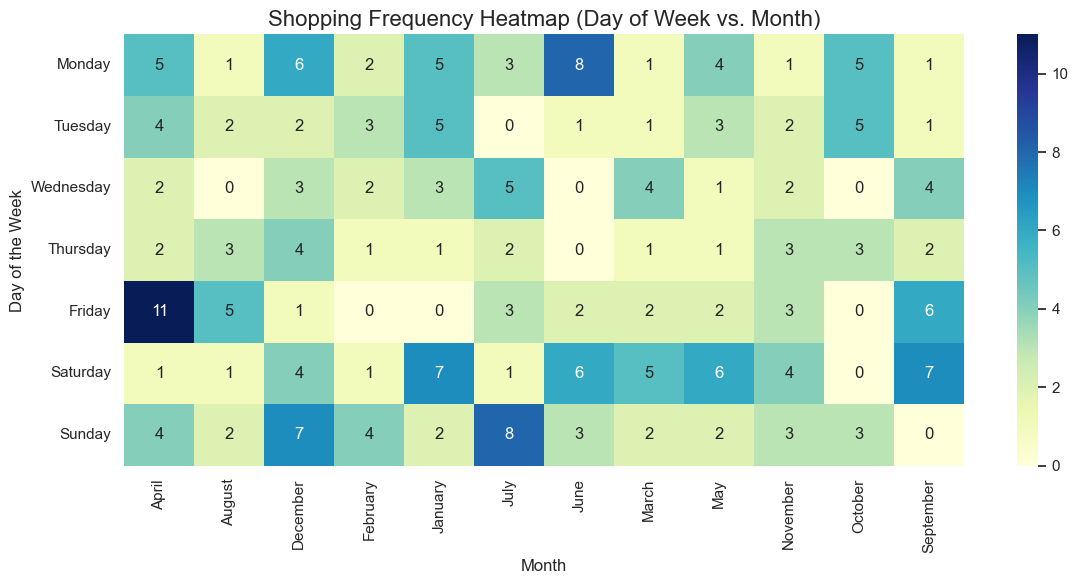

In [ ]:
#Heatmap of shopping frequency Day vs. Month
# Prepare data for heatmap: Count of purchases by Day of Week and Month
heatmap_data = df.pivot_table(index='Day of Week', columns='Month', values='Order Number', aggfunc='count')

# Reorder days for better readability
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(day_order)
heatmap_data = heatmap_data.fillna(0)

#plotting
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Shopping Frequency Heatmap (Day of Week vs. Month)', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Day of the Week')
plt.tight_layout()
plt.show()


In [9]:
# Count occurrences of each product
product_counts_filtered = df['Product'].value_counts()

# Filter products purchased more than once
repeated_purchases_filtered = product_counts_filtered[product_counts_filtered > 1]

# Convert to DataFrame for plotting
repeated_df_filtered = repeated_purchases_filtered.reset_index()
repeated_df_filtered.columns = ['Product', 'Count']

# Sort the data for better visualization
repeated_df_filtered_sorted = repeated_df_filtered.sort_values(by='Count', ascending=False)
repeated_df_filtered_sorted.head()

,Product,Count
0,Amazon Prime (Yearly Membership),6
1,Girnar Food & Beverages Pvt. Ltd. Detox Green ...,4
2,Neutrogena Deep Clean Blackhead Eliminating Da...,4
3,Odonil Bathroom Air Freshener Combo : Zipper M...,2
4,Tupperware Aqua-Slim Flip-top Water Bottle - 7...,2


C:\Users\KAREN\AppData\Local\Temp\ipykernel_14452\2899772591.py:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


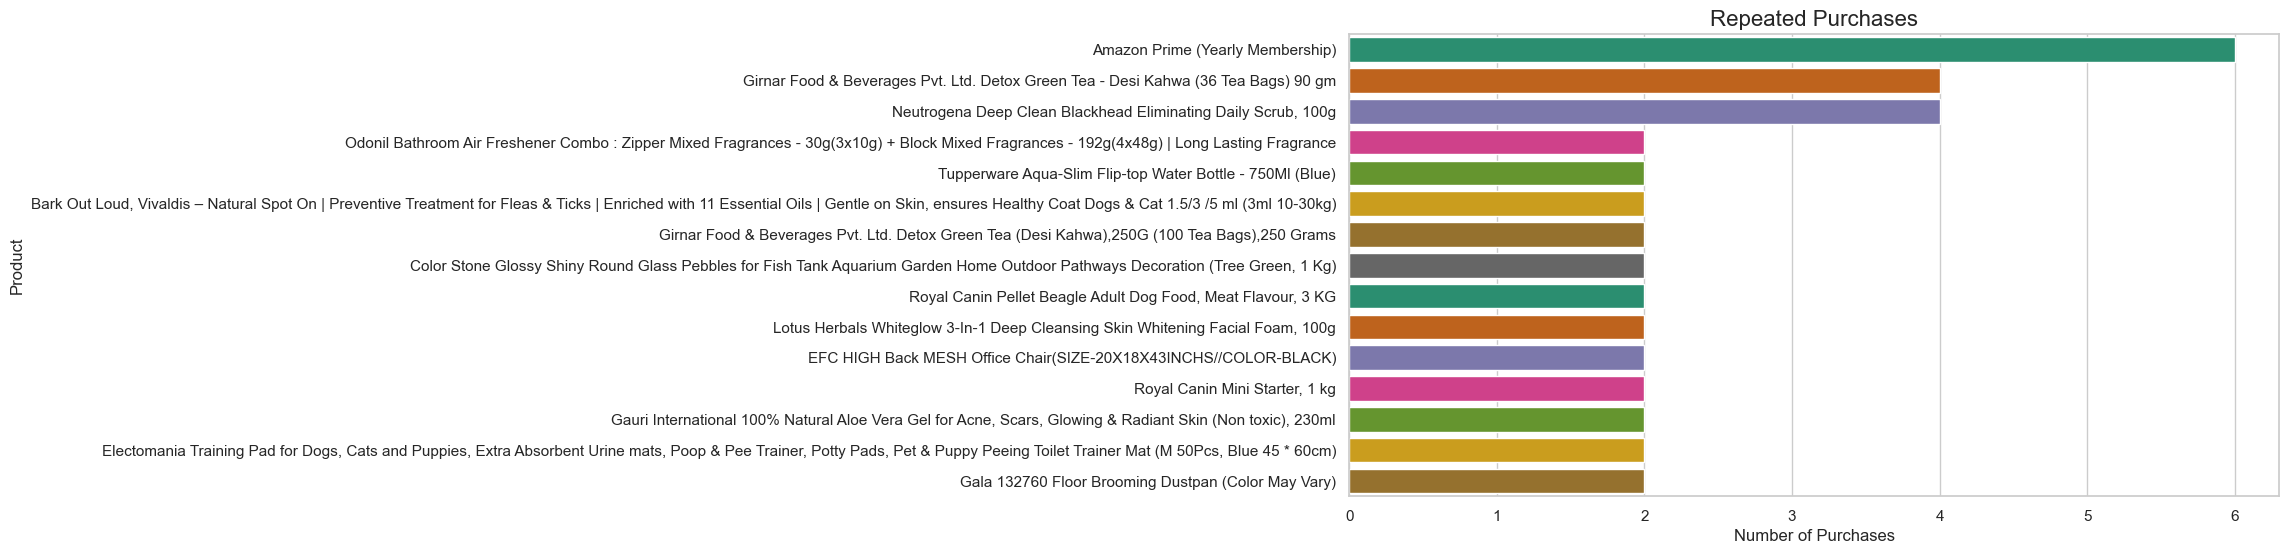

In [ ]:
#Repeated Purchases
# Set plot style
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(12,6))
sns.barplot(y='Product', x='Count', data=repeated_df_filtered_sorted, hue='Product', palette="Dark2")
plt.title('Repeated Purchases', fontsize=16)
plt.xlabel('Number of Purchases')
plt.ylabel('Product')
plt.tight_layout()
plt.show()
